In [1]:
from pylab import *
import numpy as np

# Homework 3: ISM Dynamics


### Homework 3 Reflection
### Part I: 3-phase SNR Remnant Model

#### Part a reflection

In part a, we developed the blast_wave function which is the energy-conserving phase and occurs when the supernova remnant expands and the energy is conserved. The end condition for this phase is when the post-shock temperature \( T \) drops below \( 10^6 \) K. By implementing this function, we calculated the radius and velocity of the remnant front during this phase and populated the corresponding arrays. 

def blast_wave(self):
    imin = self.i_bc[0]  # Setting index for energy-conserving phase
    t_bw0 = self.time[imin] # Saving the start time of the blast wave
    r_bw0 = self.R_f[imin]*pctocm # Saving the radius of the blast wave phase
    r_bw = r_bw0*(self.time/t_bw0)**(2./5.) # Calculating the radius of the blast wave phase as a function of time.
    v_bw0 = self.v_f[imin]/cmtokm # Saving the initial velocity of the blast wave phase and then converting it from km/s to cm/s
    v_bw = v_bw0*(self.time/t_bw0)**(-3./5.) # Calculating the velocity of the blast wave phase
    T_bw = 2.0e9*(v_bw*cmtokm/1e4)**2 # Calculating the post-shock temperature
    T_lim = 1.0e6 # Setting the temperature threshold
    imax = np.argmin(np.abs(T_bw-T_lim)) # Finding index where temperature is equal to the threshold
    self.v_f[imin:imax] = v_bw[imin:imax]*cmtokm # Saving the blast wave velocity array
    self.R_f[imin:imax] = r_bw[imin:imax]/pctocm  # Saving the blast wave radius array
    self.i_bc[1] = imax-1

#### Part b reflection

In part b, we implemented the function for the momentum-conserving phase, known as the snow_plow function. This phase occurs when the momentum is conserved, and the end condition is when the velocity of the shock front is comparable to the ambient sound speed. This phase is critical for understanding the late stages of supernova remnant evolution. By filling in the arrays for the radius and velocity during this phase, we completed the three-phase model for the supernova remnant's evolution.

def snow_plow(self):
    imin = self.i_bc[1]                   # Setting index for momentum-conserving phase
    t_sp0 = self.time[imin]               #  Saving the start time of the snow plow phase
    r_sp0 = self.R_f[imin]                # Saving the radius at start of snow plow phase
    r_sp = r_sp0 * (self.time / t_sp0)**(0.25)  # Calculateing the radius for snow plow phase
    v_sp0 = self.v_f[imin]                # Saving the velocity at start of snow plow phase
    v_sp = v_sp0 * (self.time / t_sp0)**(-0.75) # Calculating velocity for snow plow phase
    imax = np.argmin(np.abs(v_sp - self.cs_amb)) # Finding the index where velocity matches ambient sound speed
    self.v_f[imin:imax] = v_sp[imin:imax] # Saving the velocity array for snow plow phase
    self.R_f[imin:imax] = r_sp[imin:imax] # Saving the radius array for snow plow phase
    self.i_bc[2] = imax - 1               # Saving the index where snow plow phase ends


#### Part c reflection

For part c, We ran the model with the default input parameters and plotted the solution which showed the radius and velocity of the remnant front over time. The plot clearly indicated the three phases: free expansion, blast wave, and snow plow. Each phase was marked with a vertical line, allowing us to see the transition points. This visualization helped validate our model and provided a clear representation of the supernova remnant's evolution over time.


#### Part d reflection

For part d, we ran the remnant model and plotted the results for three different types of ISM conditions: Warm Neutral Medium (WNM), Cold Neutral Medium (CNM), and Molecular Cloud. The WNM plot shows a larger and faster-expanding remnant due to lower density and higher temperature. The Molecular Cloud plot shows a slower and smaller remnant due to a higher density and lower temperature. The CNM plot displays moderate expansion and velocity of the remnant and therefore lies in the middle of the WMN and the Molecular Cloud. This checks out with shock behavior previously disccussed, where a denser medium slows down the expansion and reduces the shock front's velocity.

#### Part e reflection

For part e, we ran the model while varying the progenitor mass to see its effect on the remnant properties. The plots showed that the supernova progenitor mass does have influence on the remnant's evolution, but the environment had a more significant impact. From this, we can conclude that the supernova progenitorâ€™s environment is more important than the properties.

### Part II: Thinking about Turbulence

#### Part a reflection

In part a, we defined a function to calculate the Reynolds number for a flow given the characteristic velocity, length scale, temperature, and density by incorporating the sound speed and the mean free path. This number helps us determine whether a flow is laminar or turbulent.


In [ ]:
def Re(u,R,T,rho):
    cs = 0.3*np.sqrt(T/10.) #km/s # Calculating sound speed
    n = rho/mH
    sigma = 1e-15 # The number density
    l_mfp = 1./(n*sigma) # Calculating the mean free path
    u_ratio = u/cs # Calculating the velocity ratio
    l_ratio = (R*pctocm)/l_mfp # Calculating the length ratio
return u_ratio*l_ratio

#### Part b reflection

For part b, we plotted the Reynolds number as a function of length scale for WNM and CNM conditions. The plot revealed that for a threshold Reynolds number of 10,000, the corresponding length scale for turbulent energy injection is larger in the WNM than in the CNM. From these results, we can say that a hotter medium requires shear on a larger scale to achieve turbulence compared to a colder medium and that the temperature and density of the medium also has a significant influence on turbulence.

By completing these parts, we gained a deeper understanding of the dynamics of supernova remnants and the factors influencing turbulence in the ISM.

## Part I: 3-phase SNR remnant model
We're going to construct a three phase supernova remnant model based on what we learned in class, solving for the radius and velocity of the remnant front and then use it ask questions about ISM dynamics
Below is the a `SN` class object initialized based on the initial supernova energy, the mass ejected, and the ambient conditions of the interstellar medium. Looking at the `__init__` function, you should see that we are initializing an array in time and will be filling in arrays of the shock front velocity and the shock front radius that correspond to those times. 
Each phase of the supernova expansion has a solution for the front velocity and the front radius and a corresponding condition at which the phase ends. For each phase, we will write a function that solves for the velocity, radius, and corresponding limit over which the solutions apply, filling in the array when that condition is met. Each solution needs to be properly normalized so that it matches its value at the end of the previous phase. 

As an example for what the function should do, the `free_expansion` phase function has been written for you. Note that the function fills the appropriate solution for `v_f` in units of $km/s$, `R_f` in units of $pc$ for the range of indices `imin` to `imax` over which the solution is valid. The index of the transition point is then stored so that it can be used to define `imin` for the subsequent function.

### part a. 
Fill in the function for the energy conserving phase as the `blast_wave` function. Recall that the condition for the end of the energy conserving phase is when the post-shock temperature $T < 10^6 \mathrm{K}$. 

### part b. 
Fill in the function for the momentum conserving phase as the `snow_plow` function. Recall that the condition for the end of the momentum conserving phase occurs when the velocity is on par with the ambient sound speed. 

In [2]:
Msun = 1.99e33 #mass of sun in grams
cmtokm = 1e-5 #conversion from cm to km
yrtos = 3.154e7 #seconds in year
mH = 1.67e-24 #mass of a hydrogen atom in grams
pctocm = 3.086e18 #cm in a parsec

class SN:
    def __init__(self,E0=10**51, M0=1.0, rho_amb=1*mH,T_amb=100.):
        self.E0 = E0
        self.v0 = np.sqrt(2.*E0/(M0*Msun)) #velocity of ejecta in cm/s
        self.M0 = M0*Msun # mass of the ejecta
        self.time = np.logspace(-1,9,100,dtype='float') #time in yrs
        self.v_f = np.zeros_like(self.time) #empty arrays for the velocity of the front over time, units of km/s
        self.R_f = np.zeros_like(self.time) #empty arrays for the radius of the front over time, units of pc
        self.rho_amb = rho_amb #ambient medium density in g/cm^3
        self.i_bc = [0,0,0] # to record the index of the arrays at which each phase ends
        self.cs_amb = 0.3*np.sqrt(T_amb/10.) # ambient sound speed in km/s
        
    def free_expansion(self):
        imin = 0 #index of the start of the phase
        v_free = self.v0*np.ones_like(self.time)
        r_free = v_free*self.time*yrtos
        r_lim = (3*self.M0/4./pi/self.rho_amb)**(1./3.)
        imax = np.argmin(np.abs(r_free-r_lim)) # index of the end of the phase
        self.v_f[imin:imax] = v_free[imin:imax]*cmtokm #in km/s
        self.R_f[imin:imax] = r_free[imin:imax]/pctocm #in pc
        self.i_bc[0] = imax-1 #record transition point
        
    def blast_wave(self):
        imin = self.i_bc[0]
        t_bw0 = self.time[imin]
        r_bw0 = self.R_f[imin]*pctocm
        r_bw = r_bw0*(self.time/t_bw0)**(2./5.)
        v_bw0 = self.v_f[imin]/cmtokm
        v_bw = v_bw0*(self.time/t_bw0)**(-3./5.)
        T_bw = 2.0e9*(v_bw*cmtokm/1e4)**2 
        T_lim = 1.0e6
        imax = np.argmin(np.abs(T_bw-T_lim))
        self.v_f[imin:imax] = v_bw[imin:imax]*cmtokm
        self.R_f[imin:imax] = r_bw[imin:imax]/pctocm
        self.i_bc[1] = imax-1
        
    def snow_plow(self):
        imin = self.i_bc[1]
        t_sp0 = self.time[imin]
        r_sp0 = self.R_f[imin]
        r_sp = r_sp0*(self.time/t_sp0)**(0.25)
        v_sp0 = self.v_f[imin]
        v_sp = v_sp0*(self.time/t_sp0)**(-0.75)
        imax = np.argmin(np.abs(v_sp-self.cs_amb))
        self.v_f[imin:imax] = v_sp[imin:imax]
        self.R_f[imin:imax] = r_sp[imin:imax]
        self.i_bc[2] = imax-1


### part c.
When you're happy with the solutions you've developed, run your model for the default choice of input parameters. Plot the solution and label the three phases of the solution. 

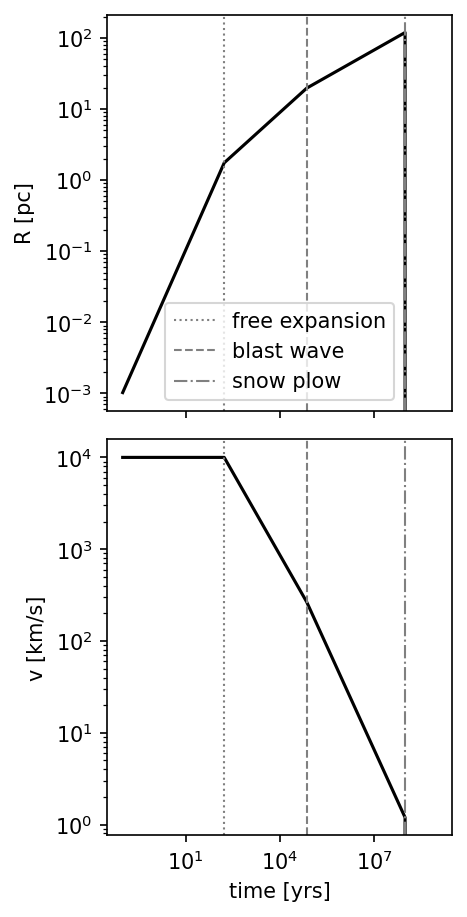

In [6]:
snr = SN()
snr.free_expansion()
snr.blast_wave()
snr.snow_plow()

f,ax=subplots(2,constrained_layout=True, dpi=150,sharex=True)
f.set_size_inches(3,6)
ax[0].loglog(snr.time,snr.R_f,color='black')
ax[1].loglog(snr.time,snr.v_f,color='black')
ax[1].set_xlabel('time [yrs]')
ax[0].set_ylabel('R [pc]')
ax[1].set_ylabel('v [km/s]')

for a in ax:
    a.axvline(snr.time[snr.i_bc[0]],color='gray',ls='dotted',lw=1,label='free expansion')
    a.axvline(snr.time[snr.i_bc[1]],color='gray',ls='dashed',lw=1,label='blast wave')
    a.axvline(snr.time[snr.i_bc[2]],color='gray',ls='-.',lw=1,label='snow plow')
ax[0].legend()

### part d.
Run the remnant model for three different types of ISM conditions and plot them all on the same plot.
1. Warm Neutral Medium
2. Cold Neutral Medium
3. Molecular Cloud 

Describe the main differences across these these different environments in terms of the remnant properties. In terms of the basic understanding of shocks we built up in class, why does this behavior hold?

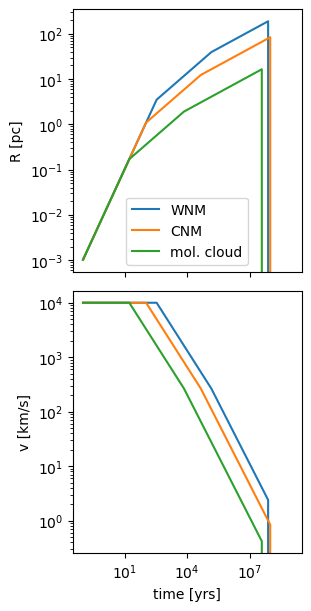

In [7]:
f,ax=subplots(2,constrained_layout=True, dpi=100,sharex=True)
f.set_size_inches(3,6)
ax[1].set_xlabel('time [yrs]')
ax[0].set_ylabel('R [pc]')
ax[1].set_ylabel('v [km/s]')

cond1 = {'rho_amb': 0.1*mH, 'T_amb':500.,'label':'WNM'}
cond2 = {'rho_amb': 5*mH, 'T_amb': 50.,'label':'CNM'}
cond3 = {'rho_amb': 1e3*mH, 'T_amb': 15, 'label':'mol. cloud'}

for cond in [cond1,cond2,cond3]:
    snr = SN(rho_amb=cond['rho_amb'],T_amb=cond['T_amb'])
    snr.free_expansion()
    snr.blast_wave()
    snr.snow_plow()

    ax[0].loglog(snr.time,snr.R_f,label=cond['label'])
    ax[1].loglog(snr.time,snr.v_f)
    
ax[0].legend()


### part e.

Now run the remnant model but varying the progenitor mass. Make a similar plot. Based on the plot, what is more important for determining the remnant properties, the supernova progenitor's environment or the supernova progenitor's properties?

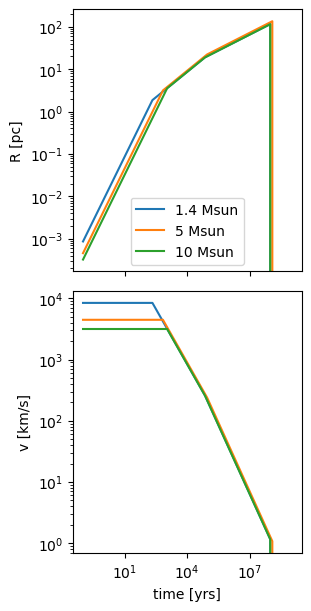

In [63]:
f,ax=subplots(2,constrained_layout=True, dpi=100,sharex=True)
f.set_size_inches(3,6)
ax[1].set_xlabel('time [yrs]')
ax[0].set_ylabel('R [pc]')
ax[1].set_ylabel('v [km/s]')

cond1 = {'M0': 1.4, 'label': '1.4 Msun'}
cond2 = {'M0': 5, 'label': '5 Msun'}
cond3 = {'M0': 10, 'label': '10 Msun'}

for cond in [cond1,cond2,cond3]:
    snr = SN(M0 = cond['M0'])
    snr.free_expansion()
    snr.blast_wave()
    snr.snow_plow()

    ax[0].loglog(snr.time,snr.R_f,label=cond['label'])
    ax[1].loglog(snr.time,snr.v_f)
    
ax[0].legend()


## Part II: Thinking about Turbulence

We talked pretty generally about ways we can generate turbulence in the ISM. Today we're going to think about how turbulence is quantified.

In the standard fluid dynamical picture, a flow is judged to be turbulent by the ratio of its inertial forces to its viscous ones. Fluid viscosity usually refers to the amount of intramolecular friction a fluid has, which is a behavior that is dependent on the fluid composition but also it's temperature and density. The more viscous a fluid is the more it damps out fluctuations that could become grow to become turbulent, so it generally moves more smoothly (a.k.a. as a laminar flow) at the same amount of agitation e.g. think how easy it is to create ripples and frothing in water by stirring vs in honey. 

The ratio of inertial forces to viscous ones is defined as the Reynolds Number $Re$, which you can derive by taking the ratio of the advection forces in the momentum equation to the viscous ones. Simplified by dimensional analysis, it is usually evaluated as a characteristic fluid velocity $u$, a characteristic length scale $R$, and the kinematic viscosity $\nu$. 

$Re = \frac{\mathrm{Inertial \ Forces}}{\mathrm{Viscous \ Forces}} = \frac{\rho u \cdot \nabla u}{\rho \nu \nabla^2 u} \sim \frac{u R}{\nu}$

When $Re \gtrsim 5000-10000$, the flow is considered turbulent.

The kinematic viscosity then has units of $v \times L$, which is often considered to encode the velocity of the smallest fluctuations times the length scale of the mean free-path $\lambda = 1/n\sigma$ between molecules. Where $n$ is the number density of atoms and $\sigma$ is the interaction cross-section. 

or: 

$\nu = \frac{u_t}{n \sigma}$

where estimates will say that $u_t = c_s$ is the velocity of fluctuations at the smallest scales i.e. the sound speed and $n$ is the number density of hydrogen atoms, and $\sigma = 10^{-15} cm^{2}$, which the area of an atom (e.g. the Bohr radius is $\sim 10^{-8} cm$.) 

### part a.

Define a function to calculate the Reynold's number for a flow given a characteristic flow velocity, characteristic flow length scale, temperature, and density.


In [72]:
def Re(u,R,T,rho):
    cs = 0.3*np.sqrt(T/10.) #km/s
    n = rho/mH
    sigma = 1e-15
    l_mfp = 1./(n*sigma)
    u_ratio = u/cs
    l_ratio = (R*pctocm)/l_mfp
    return u_ratio*l_ratio

### part b.

Typically, the characteristic velocity and length scales are considered to be the characteristic scales of the flow -- the scales at most of the energy is being injected.
For example, shear flow is the most common system for looking at turbulence generation, where one side of the flow is slower than the other side of the flow and fluctuations build up at the boundary (for a physical picture, think of how airplane turbulence forms at the surface of the wing of the plane where it cuts through the incoming air, or at pipe edges where it is being slowed down by friction with the pipe surface). For a pipe, for example, the characteristic velocity is the average flow speed and the characteristic length is the pipe radius. 

(There are many nice fluid dynamical resources online for building intuition about this, which would make good resource contributions for anyone who wants to write about them)

Anyway, in our toy model, we're going to try to see what the Reynold's numbers are like for different types of assumptions regarding the scale and physical conditions of our flow. 
Using your function in part a, plot the Reynolds number as a function of length scale (let's say from 0.01 to 100 pc). Take the characteristic velocity to be the velocities measured by Larson's Law as a function of length scale. 

Plot this for :
1. WNM density and temperature conditions
2. CNM density and temperature conditions

According to this plot, for a threshold Reynolds number of 10000, what is the corresponding length scale for turbulent energy injection for each phase in order to reproduce observed velocity dispersions?

Does a hotter medium require shear on a larger or smaller scale than a colder medium?

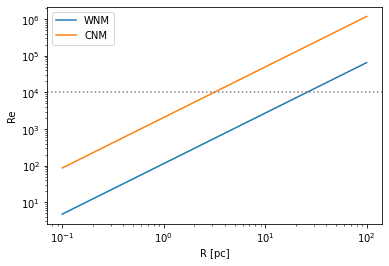

In [91]:
L = np.logspace(-1,2,100)
u_LL = 1.1*(L)**(0.38)
loglog(L, Re(u_LL,L,1000,0.1*mH),label='WNM')
loglog(L, Re(u_LL,L,300,1*mH),label='CNM')
axhline(1e4,color='gray',ls='dotted')
xlabel("R [pc]")
ylabel('Re')
legend()